In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load the CSV file
file_path = "House Price Prediction Dataset.csv"  # Replace with the path to your CSV file
df = pd.read_csv(file_path)

In [4]:
# Display the first few rows of the dataset
print("Dataset Preview:")
print(df.head())

Dataset Preview:
   Id  Area  Bedrooms  Bathrooms  Floors  YearBuilt  Location  Condition  \
0   1  1360         5          4       3       1970  Downtown  Excellent   
1   2  4272         5          4       3       1958  Downtown  Excellent   
2   3  3592         2          2       3       1938  Downtown       Good   
3   4   966         4          2       2       1902  Suburban       Fair   
4   5  4926         1          4       2       1975  Downtown       Fair   

  Garage   Price  
0     No  149919  
1     No  424998  
2     No  266746  
3    Yes  244020  
4    Yes  636056  


In [5]:
# Check the structure of the dataset
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         2000 non-null   int64 
 1   Area       2000 non-null   int64 
 2   Bedrooms   2000 non-null   int64 
 3   Bathrooms  2000 non-null   int64 
 4   Floors     2000 non-null   int64 
 5   YearBuilt  2000 non-null   int64 
 6   Location   2000 non-null   object
 7   Condition  2000 non-null   object
 8   Garage     2000 non-null   object
 9   Price      2000 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 156.4+ KB
None


In [6]:
# Assume the dataset has two columns: 'Feature' and 'Target'
# Replace with actual column names from your CSV
X = df[['Price']]  # Independent variable
y = df['Location']     # Dependent variable


In [7]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Initialize the linear regression model
model = LinearRegression()

In [10]:
# Train the model on the training data
model.fit(X_train, y_train)

ValueError: could not convert string to float: 'Urban'

In [12]:
print(y_train.head())
print(y_train.dtypes)

968       Urban
240    Downtown
819       Urban
692       Rural
420       Rural
Name: Location, dtype: object
object


In [13]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [14]:
print(X_train.dtypes)

Price    int64
dtype: object


In [15]:
X_train = pd.get_dummies(X_train, drop_first=True)  # For one-hot encoding
X_test = pd.get_dummies(X_test, drop_first=True)

In [16]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1600, 1) (1600,)
(400, 1) (400,)


In [17]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [18]:
# Predict on the test set
y_pred = model.predict(X_test)

In [19]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [20]:
# Output results
print("\nModel Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Model Coefficients: [-4.29055692e-08]
Intercept: 1.4698802668401205
Mean Squared Error: 1.2571177017451074
R-squared: 0.00030401451681316694


In [21]:
import matplotlib.pyplot as plt

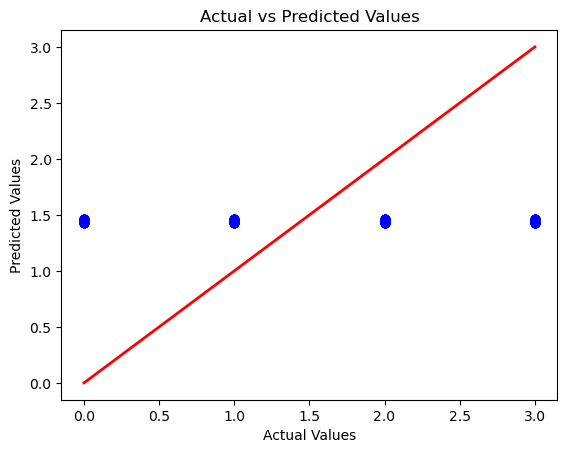

In [22]:
# Scatter plot for actual vs predicted values
plt.scatter(y_test, y_pred, color="blue")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linewidth=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()

In [23]:
# Calculate residuals
residuals = y_test - y_pred

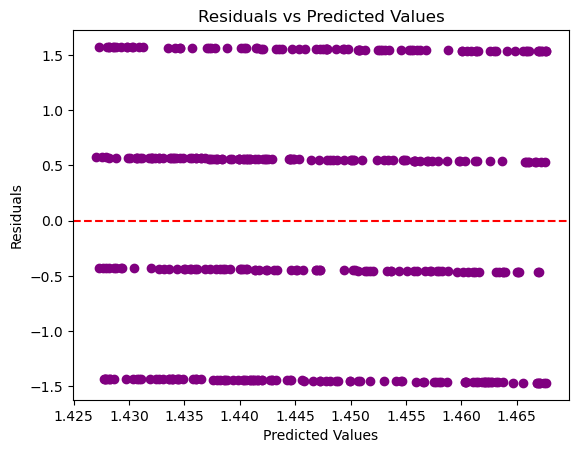

In [24]:
# Plot residuals
plt.scatter(y_pred, residuals, color="purple")
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()

In [25]:
import joblib

# Save the model
joblib.dump(model, "linear_regression_model.pkl")

# Load the model (when needed)
loaded_model = joblib.load("linear_regression_model.pkl")

In [26]:
# Assuming `new_data` is a DataFrame or array of features
new_data = [[5, 120]]  # Replace with new feature values
new_prediction = model.predict(new_data)
print("Prediction for new data:", new_prediction)

C:\Users\sandh\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: X has 2 features, but LinearRegression is expecting 1 features as input.

In [27]:
print("X_train shape:", X_train.shape)

X_train shape: (1600, 1)


In [28]:
new_data = [[5]]  # Example with 1 feature

In [29]:
new_data = [[5, 120]]  # Example with 2 features

In [30]:
new_data = [[5]]  # Correct shape for 1 feature

In [31]:
import pandas as pd

new_data = pd.DataFrame([[5, 120]], columns=["Feature1", "Feature2"])

In [32]:
# Example for a model trained with 1 feature
new_data = [[5]]  # Adjusted to match the shape of X_train
new_prediction = model.predict(new_data)
print("Prediction for new data:", new_prediction)

Prediction for new data: [1.46988005]


C:\Users\sandh\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [33]:
# Example for a model trained with 2 features
new_data = [[5, 120]]  # Adjusted to match the shape of X_train
new_prediction = model.predict(new_data)
print("Prediction for new data:", new_prediction)

C:\Users\sandh\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: X has 2 features, but LinearRegression is expecting 1 features as input.